#### Vivian Xia
## Implement a Selection Sort Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit

from random import seed
from random import random

from tabulate import tabulate

In [2]:
# Finds the smallest value in an array
def findSmallest(arr):
    time.sleep(0.1) #suspend execution for 0.1 seconds to capture a better level of detail
    
    # Stores the smallest value
    smallest = arr[0]
    # Stores the index of the smallest value
    smallest_index = 0
    for i in range(1, len(arr)):
        if arr[i] < smallest:
            smallest_index = i
            smallest = arr[i]      
    return smallest_index

# Sort array
def selectionSort(arr):
    newArr = []
    for i in range(len(arr)):
        # Finds the smallest element in the array and adds it to the new array
        smallest = findSmallest(arr)
        newArr.append(arr.pop(smallest))
    return newArr

print(selectionSort([5, 3, 6, 2, 10]))

[2, 3, 5, 6, 10]


We will again generate random data for this assignment.  Please set up five data arrays of length 5,000, 10,000, 15,000, 20,000, and 25,000 of uniformly distributed random numbers (you may use either integers or floating point).  Ensure that a common random number seed is used to generate each of the arrays. Feel free to increase the length of the arrays if it will help you illustrate your results, but please keep the difference between them constant.

Execute the base algorithm (Selection Sort) for each of the random number arrays, noting the execution time with each execution. Use one of the timing methods we learned in class, but please make sure it is giving accurate enough results.

In [3]:
#generate list of random values and apply selection sort 
def sort_time(array_len):
    """ Selection Sort Algorithm.
    
    Time the sort on a generated list of random float values.
    
    Parameters
    ----------
    array_len: length that is generated in the array.
    
    """

    np.random.seed(12345) #set random number seed
    
    start_time = time.perf_counter()
    selectionSort(list(np.random.random(array_len))) #random float values between 0 and 1 and sort using algorithm
    end_time = time.perf_counter()
    sort_time = end_time - start_time #sorting time
    
    return array_len, sort_time

In [4]:
length_array = [5000, 10000, 15000, 20000, 25000] #list of array lengths
time_list = [] #empty list to store sorting times

for length in length_array:
    time_list.append(sort_time(length)) #use sort algorithm for each length and store in time_list

In [5]:
col_names = ["Array Length","Sort Time"]

print(tabulate(time_list, headers=col_names, tablefmt="fancy_grid"))

╒════════════════╤═════════════╕
│   Array Length │   Sort Time │
╞════════════════╪═════════════╡
│           5000 │     521.563 │
├────────────────┼─────────────┤
│          10000 │    1059.57  │
├────────────────┼─────────────┤
│          15000 │    1609.33  │
├────────────────┼─────────────┤
│          20000 │    2143.38  │
├────────────────┼─────────────┤
│          25000 │    2695.43  │
╘════════════════╧═════════════╛


In [6]:
df = pd.DataFrame(time_list) #create a dataframe of the list of times
df.columns = col_names
df.head()

,Array Length,Sort Time
0,5000,521.562766
1,10000,1059.574411
2,15000,1609.330239
3,20000,2143.375043
4,25000,2695.431213


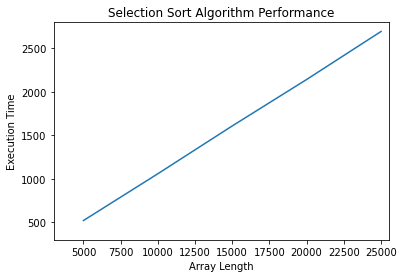

In [10]:
plt.plot(df['Array Length'], df['Sort Time']) #plot selection sort times

plt.title('Selection Sort Algorithm Performance')
plt.xlabel('Array Length')
plt.ylabel('Execution Time')

plt.show()

To apply the selection sort algorithm, a randomized list of float values needs to be first be generated. The number of randomized float values depends on the array length. The array lengths generated are 5000, 10000, 15000, 20000, and 25000 where each length is 5000 more than the previous. 

The selection sort function iterates through the generated list in sort the list from smallest to largest value. Each iteration includes taking an element and comparing it to the next element and the next until it can confirm that it is the smallest value in the list. If during the iteration, the value compares itself to another value, and the other value is greater then the other value is the new smallest value and continues down the list to compare itself to the other values. Once the iteration is done, the smallest value is appended to the new list of sorted values, resulting in O(n) time where n is the number of elements in the list. The sort algorithm has to go through that iteration n times, so it takes O(n^2) time. 

In the graph, it can be seen that as the array length increases, the execution time does not increase at the same rate. The graph curves up like a quadratic as the array length increases, showing that the execution time increases at an increased rate the larger the array length. This is also evident from the table. The list with 10000 items takes more than double the execution time as that of the list with 5000 items desppite it being double the number of items. Similarly, the list with 15000 elements has more than three times the run time as that of the list with 5000 items. This pattern continues to be true throughout the other array lengths, so the selection sort run time does not scale linearly. This makes it useful in applications because, as the load increases, the run time's rate will also increase so that performance will not be compromised.